In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df =  pd.read_csv(r"C:\Users\hp\OneDrive\Titanic_train.csv")

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [29]:
new_df= df.drop(['Cabin','Name','Ticket'],axis = 1)

In [30]:
new_df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,S
887,888,1,1,female,19.0,0,0,30.0000,S
888,889,0,3,female,NaN,1,2,23.4500,S
889,890,1,1,male,26.0,0,0,30.0000,C


In [31]:
# lets impute the other inconsistent values column like age and embarked
new_df['Age'].fillna(new_df['Age'].median(),inplace = True)
new_df['Embarked'].fillna(new_df['Embarked'].mode()[0],inplace= True)

In [32]:
new_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

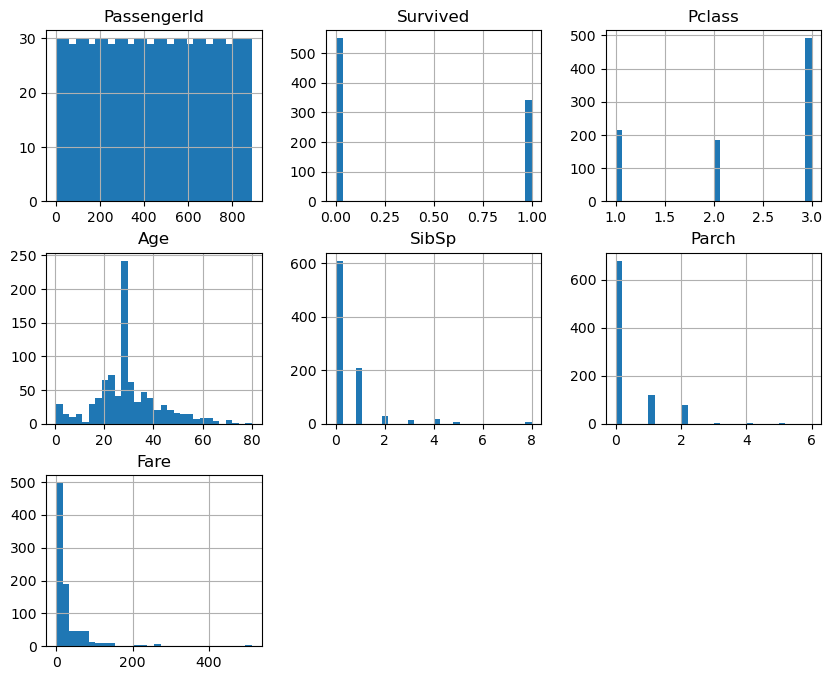

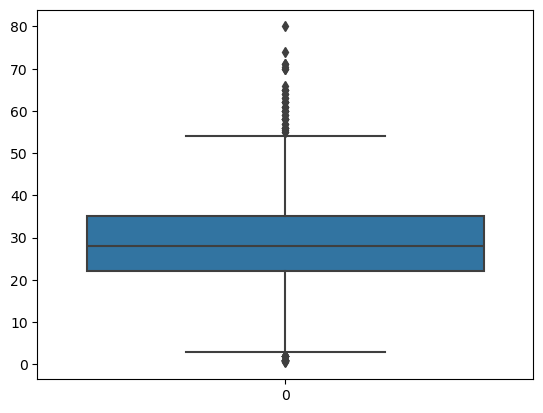

In [33]:
new_df.hist(bins=30, figsize=(10, 8))
plt.show()

# Box plot for Age
sns.boxplot(new_df['Age'])
plt.show()

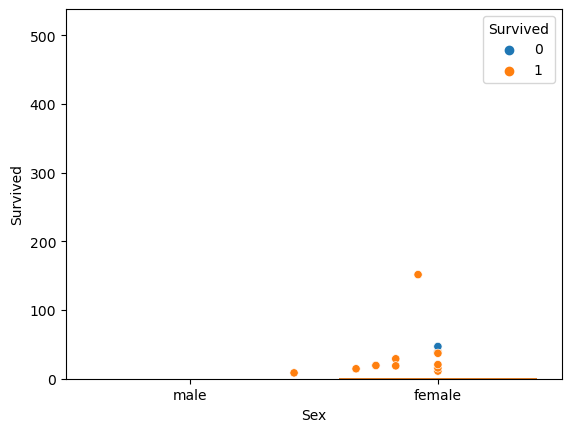

In [34]:
# Using scatter plots and bar plots to visualize relationships between features and survival.
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=new_df)
sns.barplot(x='Sex', y='Survived', data=new_df)
plt.show()

In [35]:
new_df = pd.get_dummies(new_df, columns=['Sex', 'Embarked'], drop_first=True)

In [36]:
from sklearn.model_selection import train_test_split

X = new_df.drop(['Survived'], axis=1)
y = new_df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [37]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [24]:
!pip install lightgbm

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   - -------------------------------------- 0.1/1.4 MB 825.8 kB/s eta 0:00:02
   ------ --------------------------------- 0.2/1.4 MB 2.3 MB/s eta 0:00:01
   ---------------------- ----------------- 0.8/1.4 MB 5.1 MB/s eta 0:00:01
   ---------------------------------------  1.4/1.4 MB 8.3 MB/s eta 0:00:01
   ---------------------------------------- 1.4/1.4 MB 7.7 MB/s eta 0:00:00


In [25]:
!pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB 495.5 kB/s eta 0:04:13
   ---------------------------------------- 0.1/124.9 MB 1.1 MB/s eta 0:01:55
   ---------------------------------------- 0.3/124.9 MB 1.9 MB/s eta 0:01:07
   ---------------------------------------- 0.6/124.9 MB 3.3 MB/s eta 0:00:38
   ---------------------------------------- 1.3/124.9 MB 6.0 MB/s eta 0:00:21
    --------------------------------------- 1.7/124.9 MB 7.2 MB/s eta 0:00:18
    --------------------------------------- 1.7/124.9 MB 7.2 MB/s eta 0:00:18
    --------------------------------------- 2.3/124.9 MB 7.1 MB/s eta 0:00:18
    --------------------------------------- 2.3/124.9 MB 7.1 MB/s eta 0:00:18
    --------------------------------------- 2.6/124.9 MB 6.5 MB/s eta 0:00:1

In [49]:
import warnings
warnings.filterwarnings('ignore')

In [50]:
import lightgbm as lgb

lgb_model = lgb.LGBMClassifier()
lgb_model.fit(X_train, y_train)
lgb_predictions = lgb_model.predict(X_test)


[LightGBM] [Info] Number of positive: 268, number of negative: 444
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000179 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 433
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376404 -> initscore=-0.504838
[LightGBM] [Info] Start training from score -0.504838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

In [42]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, y_train)
xgb_predictions = xgb_model.predict(X_test)


In [43]:
print(xgb_predictions)

[0 1 1 1 1 1 1 0 1 1 1 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 1
 0 1 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 1 1 1 1 0 1 1 0 0 1 0 0 0 1 1 1 1 1
 0 0 1 1 1 1 0 1 1 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1
 0 1 0 0 0 0 0 1 0 0 1 1 1 0 1 1 0 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 1 0 1
 1 0 0 0 0 0 0 0 1 1 1 1 1 0 0 1 0 0 0 1 0 0 0 1 1 1 0 0 0 1 1]


In [44]:
print(lgb_predictions)

[0 1 0 1 0 1 1 0 1 1 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 1 1 0 0 0 0 0 1 0 0 0 0 1 1 1 0 0 0 1 1 1 1 1 0 1 1 0 0 1 0 0 0 1 1 1 1 1
 0 0 1 1 1 1 0 1 1 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1
 0 1 0 0 0 0 0 1 0 0 1 1 1 0 1 1 0 1 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 1 1 1 1 0 0 0 1 0 0 0 1 0 0 0 1 1 1 0 0 0 1 1]


In [48]:
from sklearn.model_selection import GridSearchCV

param_grid = {'learning_rate': [0.01, 0.1], 'n_estimators': [50, 100, 200]}
grid_search = GridSearchCV(estimator=lgb_model, param_grid=param_grid, scoring='accuracy', cv=5)
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_


[LightGBM] [Info] Number of positive: 214, number of negative: 355
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000166 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 370
[LightGBM] [Info] Number of data points in the train set: 569, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376098 -> initscore=-0.506142
[LightGBM] [Info] Start training from score -0.506142
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


# Comparitive Analysis

In [51]:
results = {
    "Model": ["LightGBM", "XGBoost"],
    "Accuracy": [accuracy_score(y_test, lgb_predictions), accuracy_score(y_test, xgb_predictions)],
    "Precision": [precision_score(y_test, lgb_predictions), precision_score(y_test, xgb_predictions)],
    "Recall": [recall_score(y_test, lgb_predictions), recall_score(y_test, xgb_predictions)],
    "F1-Score": [f1_score(y_test, lgb_predictions), f1_score(y_test, xgb_predictions)]
}
print(pd.DataFrame(results))


      Model  Accuracy  Precision    Recall  F1-Score
0  LightGBM  0.798883   0.779412  0.716216  0.746479
1   XGBoost  0.793296   0.753425  0.743243  0.748299


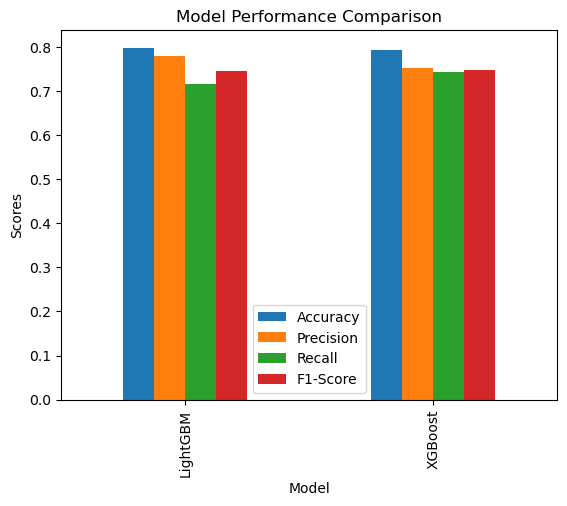

In [52]:
result_df = pd.DataFrame(results)
result_df.set_index('Model').plot(kind='bar')
plt.title('Model Performance Comparison')
plt.ylabel('Scores')
plt.show()


# performance on test data

In [29]:
test_df = pd.read_csv(r"C:\Users\hp\OneDrive\New Titanic_test.csv")
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1


In [30]:
test_df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Survived
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000,418.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188,0.315789
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576,0.465387
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800,0.000000
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200,0.000000
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000,1.000000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200,1.000000


In [31]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
 11  Survived     418 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [32]:
new_test_df= test_df.drop(['Cabin','Name','Ticket'],axis = 1)
new_test_df

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,892,3,male,34.5,0,0,7.8292,Q,0
1,893,3,female,47.0,1,0,7.0000,S,1
2,894,2,male,62.0,0,0,9.6875,Q,0
3,895,3,male,27.0,0,0,8.6625,S,0
4,896,3,female,22.0,1,1,12.2875,S,1
...,...,...,...,...,...,...,...,...,...
413,1305,3,male,NaN,0,0,8.0500,S,0
414,1306,1,female,39.0,0,0,108.9000,C,0
415,1307,3,male,38.5,0,0,7.2500,S,0
416,1308,3,male,NaN,0,0,8.0500,S,0


In [33]:
# lets impute the other inconsistent values column like age and embarked
new_test_df['Age'].fillna(new_test_df['Age'].median(),inplace = True)
new_test_df['Fare'].fillna(new_test_df['Fare'].mean(),inplace =True)
new_test_df.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
Survived       0
dtype: int64

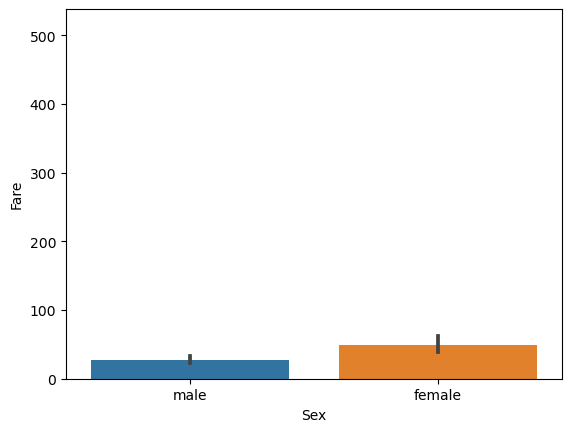

In [34]:
# Using scatter plots and bar plots to visualize relationships between features and survival.
sns.scatterplot(x='Age', y='Fare', data=new_test_df)
sns.barplot(x='Sex', y='Fare', data=new_test_df)
plt.show()

In [35]:
new_test_df = pd.get_dummies(new_test_df, columns=['Sex', 'Embarked'], drop_first=True)

In [36]:
from sklearn.model_selection import train_test_split

X = new_test_df.drop(['Survived'], axis=1)
y = new_test_df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [38]:
new_test_df['Survived'].value_counts()

0    286
1    132
Name: Survived, dtype: int64

In [39]:
import lightgbm as lgb

lgb_model = lgb.LGBMClassifier()
lgb_model.fit(X_train, y_train)
lgb_predictions = lgb_model.predict(X_test)

[LightGBM] [Info] Number of positive: 108, number of negative: 226
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.020341 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 334, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.323353 -> initscore=-0.738404
[LightGBM] [Info] Start training from score -0.738404
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


In [40]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, y_train)
xgb_predictions = xgb_model.predict(X_test)


In [41]:
print(xgb_predictions)

[0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 1 1 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 1 0 0 0 0 1 1 1 0 0 0 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 1 1 1 0 0
 0 1 0 1 1 0 0 1 0 0]


In [42]:
print(lgb_predictions)

[0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 1 1 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 1 0 0 0 0 1 1 1 0 0 0 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 1 1 1 0 0
 0 1 0 1 1 0 0 1 0 0]


In [43]:
from sklearn.model_selection import GridSearchCV

param_grid = {'learning_rate': [0.01, 0.1], 'n_estimators': [50, 100, 200]}
grid_search = GridSearchCV(estimator=lgb_model, param_grid=param_grid, scoring='accuracy', cv=5)
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_

[LightGBM] [Info] Number of positive: 87, number of negative: 180
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002766 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 216
[LightGBM] [Info] Number of data points in the train set: 267, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.325843 -> initscore=-0.727049
[LightGBM] [Info] Start training from score -0.727049
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

In [44]:
results = {
    "Model": ["LightGBM", "XGBoost"],
    "Accuracy": [accuracy_score(y_test, lgb_predictions), accuracy_score(y_test, xgb_predictions)],
    "Precision": [precision_score(y_test, lgb_predictions), precision_score(y_test, xgb_predictions)],
    "Recall": [recall_score(y_test, lgb_predictions), recall_score(y_test, xgb_predictions)],
    "F1-Score": [f1_score(y_test, lgb_predictions), f1_score(y_test, xgb_predictions)]
}
print(pd.DataFrame(results))


      Model  Accuracy  Precision  Recall  F1-Score
0  LightGBM       1.0        1.0     1.0       1.0
1   XGBoost       1.0        1.0     1.0       1.0


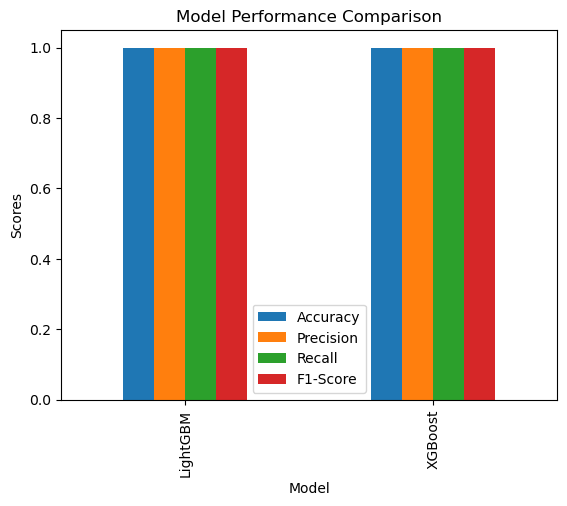

In [45]:
result_df = pd.DataFrame(results)
result_df.set_index('Model').plot(kind='bar')
plt.title('Model Performance Comparison')
plt.ylabel('Scores')
plt.show()
